In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv('train.csv')
train_df_copy=train_df.copy()
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
test_df=pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Statistics

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


 #most of the people had no parch and sibsp 
  
  #fare has many outliers 
  
  #maximum people boarded are 3rd class

In [7]:
train_df.skew().T

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [8]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

## Data Interaction

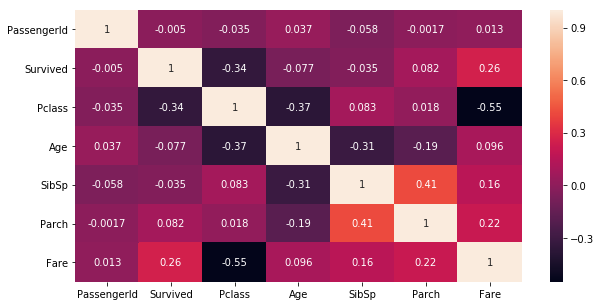

In [10]:
plt.figure(figsize=(10,5))
corr= train_df.corr()
sns.heatmap(corr,annot=True)

In [11]:
corr.abs()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.005007,0.035144,0.036847,0.057527,0.001652,0.012658
Survived,0.005007,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307
Pclass,0.035144,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500
Age,0.036847,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067
SibSp,0.057527,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651
Parch,0.001652,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000


/Users/Niharika/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Niharika/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


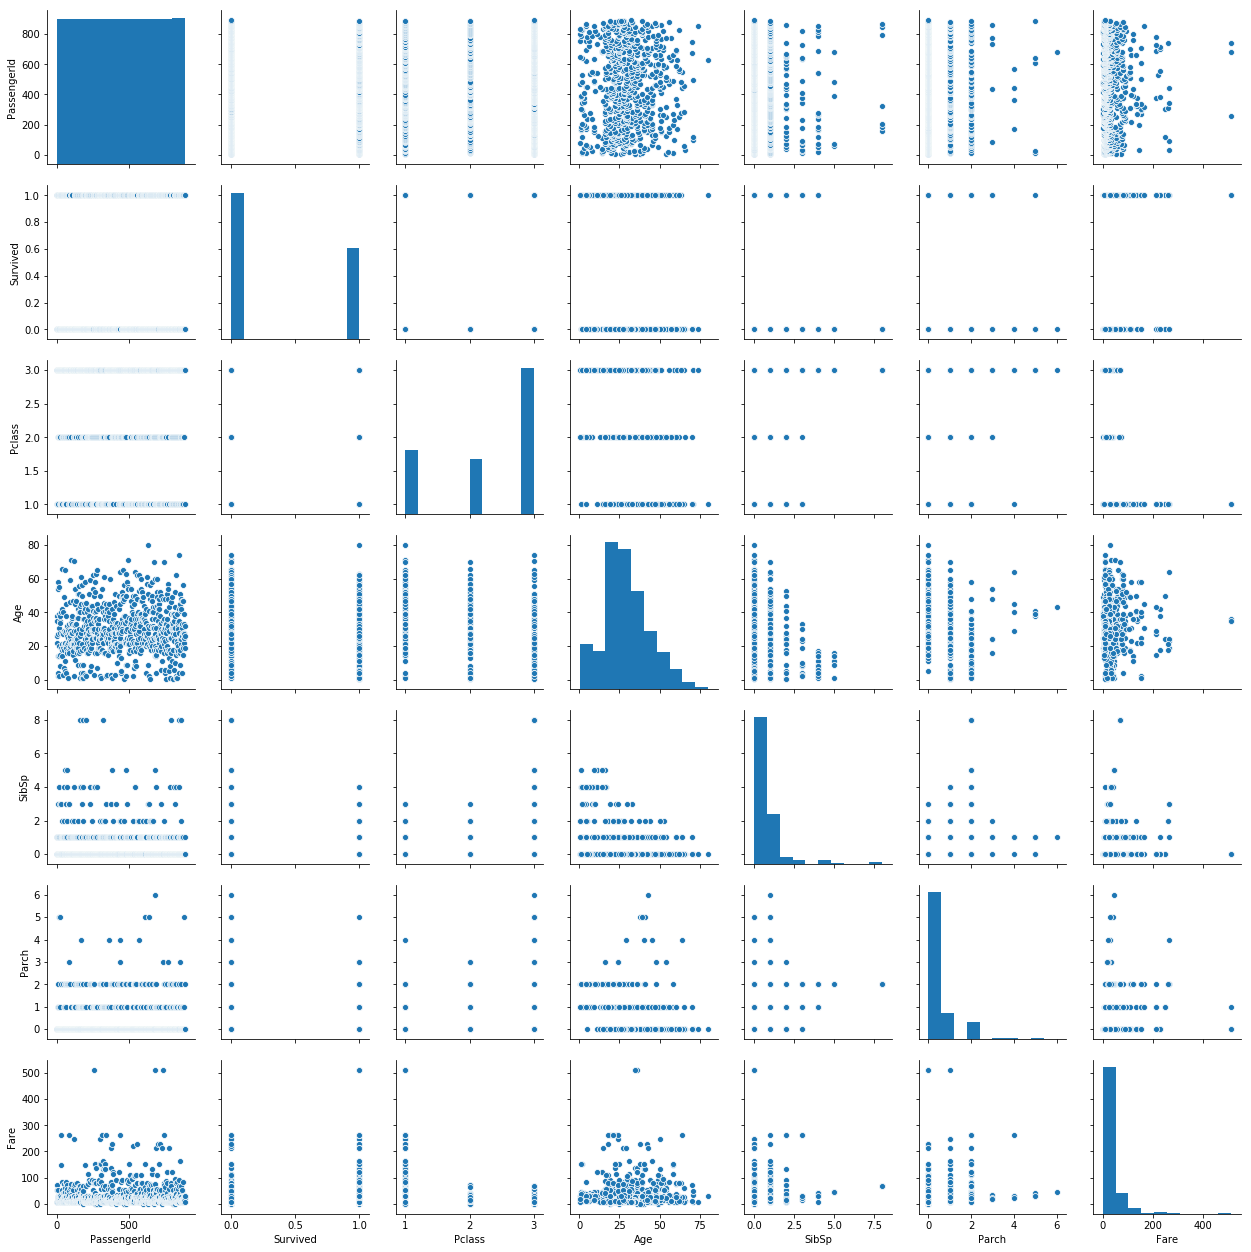

In [12]:
sns.pairplot(train_df)

11
Survived


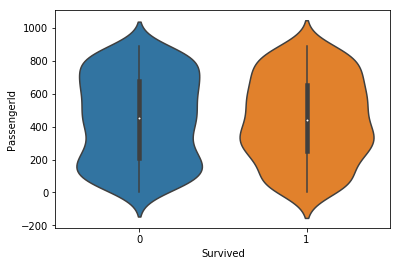

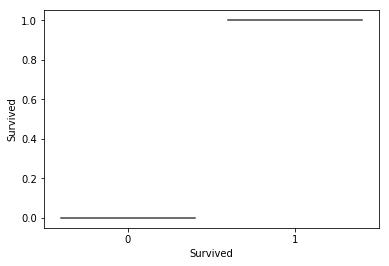

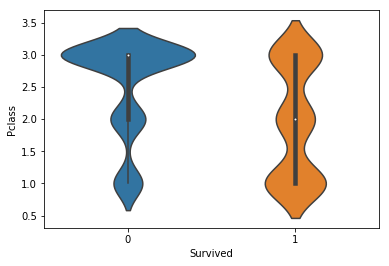

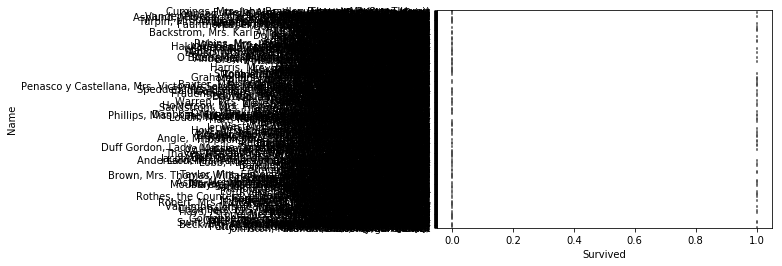

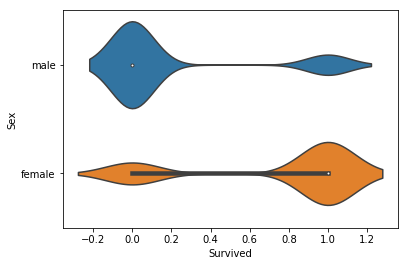

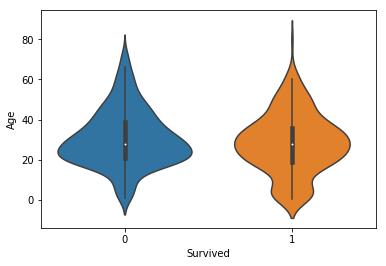

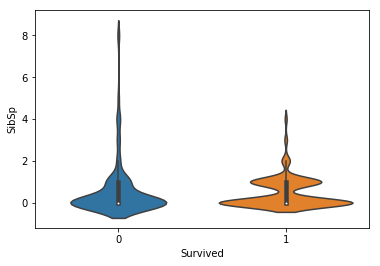

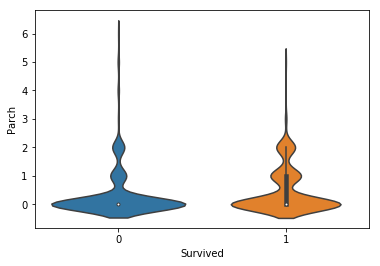

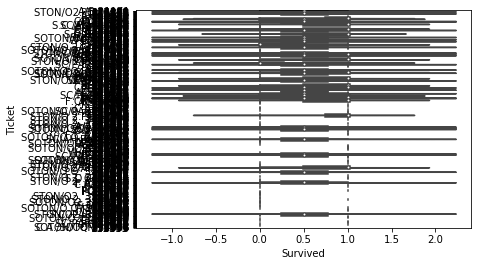

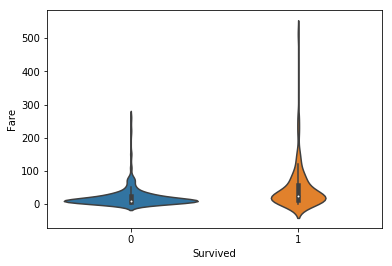

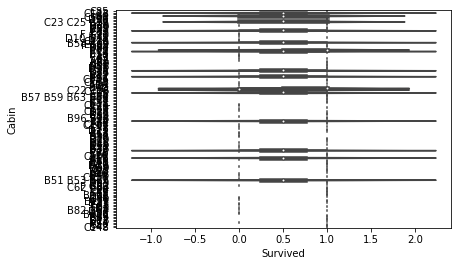

In [13]:
cols = train_df.columns

#number of attributes (exclude target)
size = len(cols)-1
print(size)

#x-axis has target attribute to distinguish between classes
x = cols[1]
print(x)

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=train_df,x=x,y=y[i])  
    plt.show()



#survival rate is low in 3rd class,more in 1st class

#female gender survived more than male

#children survival rate is considerably high

#survived people had no or 1 sibsp, sibsp is high for class 0

#high fare people survived and class 0 people fare is from 0-100 for most of them



## Data Cleaning 

In [14]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Missing values code

In [15]:
all_columns=train_df.drop(columns=['Survived'],axis=1).columns


In [16]:
def missing_values(columns,train,test):
    for col in columns :
        if train[col].dtype == 'object':
            train[col] = train[col].fillna(train[col].mode()[0])
            test[col]= test[col].fillna(test[col].mode()[0])
        else:
            train[col] = train[col].fillna(train[col].median())
            test[col]= test[col].fillna(test[col].median())

            
def one_hot_encoding(columns,data):
    dummies=pd.get_dummies(data,columns=columns,drop_first=True)
    return dummies
    

In [17]:
after_missin_= missing_values(all_columns,train_df,test_df)

In [18]:
import re
train_df['Title'] = train_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
train_df['Title'] = train_df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
train_df['Title'] = train_df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                    'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
test_df['Title'] = test_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
test_df['Title'] = test_df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
test_df['Title'] = test_df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
          

                                            

In [19]:
train_df=train_df.drop(columns=['Name','Cabin','Ticket','Survived'],axis=1)
test_df=test_df.drop(columns=['Name','Cabin','Ticket'],axis=1)

In [20]:
encode_columns=['Sex','Pclass','SibSp','Parch','Embarked','Title']


In [21]:
merge_df=pd.concat([train_df,test_df],axis=0)

In [22]:
merge_df['Fare']= np.log1p(merge_df['Fare'])

In [23]:
merge_df['Age'] = merge_df['Age'].astype(int)
merge_df.loc[ merge_df['Age'] <= 11, 'Age'] = 0
merge_df.loc[(merge_df['Age'] > 11) & (merge_df['Age'] <= 18), 'Age'] = 1
merge_df.loc[(merge_df['Age'] > 18) & (merge_df['Age'] <= 22), 'Age'] = 2
merge_df.loc[(merge_df['Age'] > 22) & (merge_df['Age'] <= 27), 'Age'] = 3
merge_df.loc[(merge_df['Age'] > 27) & (merge_df['Age'] <= 33), 'Age'] = 4
merge_df.loc[(merge_df['Age'] > 33) & (merge_df['Age'] <= 40), 'Age'] = 5
merge_df.loc[(merge_df['Age'] > 40) & (merge_df['Age'] <= 66), 'Age'] = 6
merge_df.loc[ merge_df['Age'] > 66, 'Age'] = 6


In [24]:
merge_df['Fam']= merge_df['SibSp']+merge_df['Parch']+1

In [25]:
merge_df=one_hot_encoding(encode_columns,merge_df)

In [26]:
merge_df

,PassengerId,Age,Fare,Fam,Sex_male,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,...,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,1,2,2.110213,2,1,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,5,4.280593,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3,2.188856,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,4,5,3.990834,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,5,2.202765,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2.202765,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
414,1306,5,4.699571,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
415,1307,5,2.110213,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
416,1308,3,2.202765,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [27]:
merge_train=merge_df.iloc[0:891]
merge_test=merge_df.iloc[891:]

In [28]:
merge_test

,PassengerId,Age,Fare,Fam,Sex_male,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,...,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,892,5,2.178064,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,893,6,2.079442,2,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,894,6,2.369075,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,895,3,2.268252,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,896,2,2.586824,3,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2.202765,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
414,1306,5,4.699571,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
415,1307,5,2.110213,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
416,1308,3,2.202765,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [29]:
X = merge_train
y = train_df_copy['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Feature engineering

In [30]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

/Users/Niharika/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [31]:
seed=42

# Creating Models

lr = LogisticRegression()

svc = SVC(random_state=seed, probability=True)
dtree = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(10, random_state=seed)
gdb = GradientBoostingClassifier(random_state=seed)
adb = AdaBoostClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
knn = KNeighborsClassifier()
lgbm = LGBMClassifier(random_state=seed)

first_models = [ lr,  svc, dtree, 
                 rf, gdb, adb, xgb, knn, lgbm]
first_model_names = ['Linear Regression','SVM','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors','Light GBM'] 
pred_col=[ 'lr', 'svc', 'dtree', 
                 'rf', 'gdb', 'adb', 'xgb', 'knn', 'lgbm']
# Defining other steps

In [36]:
from sklearn import metrics
n_folds=10
skf= model_selection.ShuffleSplit(n_splits = n_folds, test_size = 0.3, train_size = 0.7, random_state = seed )
std_sca= StandardScaler()

In [37]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = X_test[['PassengerId']]

train_size = X.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []
row_index=0

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                     ('Estimator', model)])
    MLA_name = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(model.get_params())
    
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv  = skf, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    
    model_pipeline.fit(X_train, y_train)
    MLA_predict[MLA_name] = model_pipeline.predict(X_test)
    row_index+=1
        

/Users/Niharika/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Niharika/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [34]:
MLA_predict

,PassengerId,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier,KNeighborsClassifier,LGBMClassifier
880,881,1,1,0,1,1,1,1,1,1
174,175,0,0,0,0,0,0,0,0,0
15,16,1,1,0,1,1,1,1,1,1
530,531,1,1,1,1,1,1,1,1,1
793,794,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
140,141,1,1,1,1,1,1,1,1,1
228,229,0,0,1,0,0,0,0,0,0
405,406,0,0,0,0,0,0,0,0,0
129,130,0,0,0,0,0,0,0,0,0


In [35]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.820974,0.81236,0.0477185
1,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.626966,0.607865,0.074583
2,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.747191,0.00417657
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.985019,0.813483,0.0234223
4,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.928464,0.822472,0.139803
5,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.848315,0.808989,0.0997172
6,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.908614,0.817978,0.109192
7,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.71573,0.541573,0.00315409
8,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.982772,0.813483,0.0526666


#### predicting on test data

,PassengerId,Age,Fare,Fam,Sex_male,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,...,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,892,5,2.178064,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,893,6,2.079442,2,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,894,6,2.369075,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,895,3,2.268252,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,896,2,2.586824,3,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2.202765,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
414,1306,5,4.699571,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
415,1307,5,2.110213,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
416,1308,3,2.202765,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [39]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = merge_test[['PassengerId']]

train_size = X.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []
row_index=0

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                     ('Estimator', model)])
    MLA_name = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(model.get_params())
    
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv  = skf, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    
    model_pipeline.fit(X_train, y_train)
    MLA_predict[MLA_name] = model_pipeline.predict(merge_test)
    row_index+=1
        

/Users/Niharika/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Niharika/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [43]:
y_pred=gdb.predict(merge_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [44]:
prediction=pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],prediction],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('titanic_submission5.csv',index=False)